# Data Selection and Modelling

To study the interplay between the science and politics of migration management, we study publications on this topic between 1950 and 2000 in terms of the actors involved in this discourse and the main themes that were discussed.

This notebook describes and explains our data selection and modelling choices. We transform all article metadata into a standard format, which requires several modelling and classification decisions. We describe these steps using the Data Scopes model (Hoekstra and Koolen 2019).

## Publications included in the study

1. REMP Publications
2. International Migration journal
3. International Migration Review journal

## Period of Study

Our analysis covers the period 1950-2000. The reason for 1950 is based on both the start of the Intergovernmental Committee on European Migration (ICEM in 1952) and the start of the Research group on European Migration Problems (REMP in 1951). 

The choice for 2000 as the end of this period is that it covers the periods of transitions, first from the ICEM first into the Intergovernmental Committee on Migration (ICM, in 1980) and then into the current International Organization on Migration (IOM, since 1989). By including 11 years after the transition to IOM, we can see what, if anything, changes after each transition.

## Extracting Articles Records From Crawled Table of Contents

We crawled all the Table of Content pages of the issues of *International Migration* (IM) journal published by Wiley and *International Migration Review* (IMR) published by Sage. The HTML files are stored in separate directories per journal. From these HTML files we extract information about:

- the issues (number, volume, publication date, section titles, publisher, journal title)
- the articles (title, author, doi, publication date, page numbers)

For the Publications and Bulletin of Research on European Migration Problems (REMP), we manually collected bibliographic information in a spreadsheet, as this information is not available online. 



### Extracting Bibliographic Records for International Migration

We start with the International Migration records. Below is a screenshot from the Table of Contents for Volume 2 of the journal of International Migration in 1962 (then called Migration).

![Migration-1962-Table-of-Contents](../images/ToC-Wiley-Migration-1962.png)

From this table of content we extract the following information per article, using the first article, i.e. the Foreword, as an example:

- `article_title`: "Foreword",
- `article_doi`: "https://onlinelibrary.wiley.com/doi/10.1111/j.1468-2435.1962.tb00852.x"
- `article_author`: "B. W. HAVEMAN && Intergovernmental Committee for European Migration"
- `article_author_index_name`: "HAVEMAN, B W && Migration, Intergovernmental Committee For European"
- `article_author_affiliation`: ""
- `article_page_range`: "5"
- `article_pub_date`: "12 July 1962"
- `article_pub_year`: 1962
- `issue_section`: "Foreword"
- `issue_number`: "3-4"
- `issue_title`: " Migration: Vol 2, No 3–4"
- `issue_page_range`: "5-83"
- `issue_pub_date`: "July–December 1962"
- `issue_pub_year`: 1962
- `volume`: "2"
- `journal`: "Migration"
- `publisher`: "Wiley"

The following modelling decisions have been made:

- The `article_doi` information is embedded in the HTML hyperlink around the title Foreword, which will take you to the article landing page. 
- For the `article_author_name`, the values `B. W. HAVEMAN` and `Intergovernmental Committee for European Migration` are in separate HTML elements in the author block, so we treat them as separate authors, even though the latter name is probably intended as the affiliation of the former. This is because, by default, no affiliation is given, and for articles where there are multiple authors, the multiple elements are used to separate the authors. We separate multiple names using a double ampersand (&&) for easy splitting of names, as a single ampersand could be part of organisation name.
- The `article_author_affiliation` field is empty by default for the IM records, because, as stated above, IM does not provide affiliation information for its authors. We include this field for consistency, because the IMR journal does provide affiliation information.
- The `article_pub_date` is taken from the string after `First published:` and the `article_pub_year` is derived from this date. We note that these first publication dates for the individual articles do not always correspond to the publication date of the issue, but strangely, when they are not the same they are often several years into the future. 
- The `issue_section` information refers to the section in the issue that an article is published in. For the Foreword, this section is called `Foreword`, the Introduction is in the `Introduction` section, followed by a number of articles in the section `Summary Records of the Debate`. These section titles are used to easily distinguish between main articles from front and back matter articles (preamble, introduction, index, ...).
- The `issue_title` is taken from the HTML metadata elements and is not displayed on the page. 
- The `issue_pub_date` and `issue_pub_year` are taken from the issue metadata that is shown in the top. We assume that the date of publication of the issue is the actual publication date of the individual articles. 
- The `journal` is taken from the HTML metadata elements and is not displayed on the page. We note that the journal was called *Migracion* in 1961 (Volume 1), *Migration* in 1962 (Volume 2) and *International Migration* from 1963 onwards.


In [1]:
import glob
import json

from scripts.journal_crawl import read_file_soup, extract_wiley_issue_records

# The directory with the crawled HTML files
wiley_dir = '../data/wiley-IM-crawl/'
# Get a list of all the filenames
wiley_issue_files = glob.glob(wiley_dir + '*.html')

wiley_records = []
# iterate over the files with ToC of individual issues
for wiley_issue_file in wiley_issue_files:
    # read the content of the HTML file with the Beautifulsoup library
    issue_soup = read_file_soup(wiley_issue_file)
    # extract bibliographic records of all articles from the issue ToC.
    wiley_records.extend(extract_wiley_issue_records(issue_soup))

selected_records = [record for record in wiley_records if record['issue_pub_year'] <= 2000]

print('Publication Series: International Migration (Wiley)')
print('Number of records:', len(selected_records))
print('\nRecord headers:', selected_records[0].keys())
print('\nExample record:')
selected_records[0]

Publication Series: International Migration (Wiley)
Number of records: 1210

Record headers: dict_keys(['article_title', 'article_doi', 'article_author', 'article_author_index_name', 'article_author_affiliation', 'article_page_range', 'article_pub_date', 'article_pub_year', 'issue_section', 'issue_number', 'issue_title', 'issue_page_range', 'issue_pub_date', 'issue_pub_year', 'volume', 'journal', 'publisher'])

Example record:


{'article_title': 'The New U.S.A. Immigration Law',
 'article_doi': 'https://onlinelibrary.wiley.com/doi/10.1111/j.1468-2435.1965.tb00872.x',
 'article_author': 'D.G. BENN',
 'article_author_index_name': 'BENN, DG',
 'article_author_affiliation': '',
 'article_page_range': '99',
 'article_pub_date': '01 July 1965',
 'article_pub_year': 1965,
 'issue_section': 'Original Article',
 'issue_number': '3',
 'issue_title': ' International Migration: Vol 3, No 3',
 'issue_page_range': '99-180',
 'issue_pub_date': 'July 1965',
 'issue_pub_year': 1965,
 'volume': '3',
 'journal': 'International Migration',
 'publisher': 'Wiley'}

In [2]:
# Write the records to file in JSON format
wiley_records_file = '../data/wiley-IM-records.json'
with open(wiley_records_file, 'wt') as fh:
    json.dump(selected_records, fh)

### Extracting Bibliographic Records for International Migration Review

Next, we describe the extraction of records for the *International Migration Review* journal. Below is a screenshot from the Table of Contents for Volume 2 of the journal of International Migration in 1962 (then called Migration).

![International-Migration-Review-1975-Table-of-Contents](../images/ToC-Sage-International-Migration-Review-1975.png)

From this table of content we extract the following information per article, using the first article, i.e. the Foreword, as an example:

- `article_title`: "Introduction"
- `article_doi`: "https://journals.sagepub.com/doi/pdf/10.1177/019791837500900201"
- `article_author`: "John J. Macisco, Jr. && George C. Myers"
- `article_author_index_name`: "Macisco, John J Jr && Myers, George C"
- `article_author_affiliation`: "Fordham University Bronx, New York && Fordham University Bronx, New York"
- `article_page_range`: "111-114"
- `article_pub_date`: "Jun 1, 1975"
- `article_pub_year`: 1975
- `issue_section`: "Article"
- `issue_number`: "2"
- `issue_title`: "International Migration Review - Volume 9, Number 2, Jun 01, 1975"
- `issue_page_range`: null
- `issue_pub_date`: "Jun 01, 1975"
- `issue_pub_year`: 1975
- `volume`: "9"
- `journal`: "International Migration Review"
- `publisher`: "Sage Publishing"

The following modelling decision has been made (we only discuss the differences with the IM records above):

- The `article_author_affiliation` values are embedded in the HTML field for individual author names. The affiliation is displayed to the user when they hover the mouse tooltip on an author name, as shown in the middle of the image with the author `George C. Myers`, where the affiliation is `Fordham University Bronx, New York`. We note that the affiliation field does not always contain affiliation information. For some authors, it is empty, and for a small number of authors, it contains their job title and location, as for the name `Alicia Unger De Zárate` in the bottom of the image, where the affiliation field contains `Social Demographer, Mount Vernon, New York`.


In [3]:
from scripts.journal_crawl import read_file_soup, extract_sage_article_records


journal_dir = '../data/sage-IMR-crawl/'

sage_issue_files = glob.glob(journal_dir + 'International_Migration_Review-*.html')

sage_records = []
for sage_issue_file in sage_issue_files:
    sage_issue_soup = read_file_soup(sage_issue_file)
    sage_records.extend(extract_sage_article_records(sage_issue_soup))

selected_records = [record for record in sage_records if record['issue_pub_year'] <= 2000]

print('Publication Series: International Migration Review (Sage Publishing)')
print('Number of records:', len(selected_records))
print('\nRecord headers:', selected_records[0].keys())
print('\nExample record:')
selected_records[0]

Publication Series: International Migration Review (Sage Publishing)
Number of records: 4048

Record headers: dict_keys(['article_title', 'article_doi', 'article_author', 'article_author_index_name', 'article_author_affiliation', 'article_page_range', 'article_pub_date', 'article_pub_year', 'issue_section', 'issue_number', 'issue_title', 'issue_page_range', 'issue_pub_date', 'issue_pub_year', 'volume', 'journal', 'publisher'])

Example record:


{'article_title': "Immigrants’ Attitudes toward their Children's Inter-Ethnic Marriages in a Canadian Community",
 'article_doi': 'https://journals.sagepub.com/doi/pdf/10.1177/019791837100500101',
 'article_author': 'Peter D. Chimbos',
 'article_author_index_name': 'Chimbos, Peter D',
 'article_author_affiliation': 'Department of Sociology, Lakehead University, Ontario, Canada.',
 'article_page_range': '5-17',
 'article_pub_date': 'Mar 1, 1971',
 'article_pub_year': 1971,
 'issue_section': 'Article',
 'issue_number': '1',
 'issue_title': 'International Migration Review - Volume 5, Number 1, Mar 01, 1971',
 'issue_page_range': None,
 'issue_pub_date': 'Mar 01, 1971',
 'issue_pub_year': 1971,
 'volume': '5',
 'journal': 'International Migration Review',
 'publisher': 'Sage Publishing'}

In [4]:
# Write the records to file in JSON format
sage_records_file = '../data/sage-IMR-records.json'
with open(sage_records_file, 'wt') as fh:
    json.dump(selected_records, fh)


### Extracting Bibliographic Records for the Publications and Bulletin of REMP 

The REMP publications and bulletins are not available online, so we have no screenshots. Instead, we manually gather information on all the publications. For several of the fields in our article record model, no information is provided, but for the fields we use in this study, we recorded the required information in a spreadsheet. 

- `article_title`: "De gaande man : gronden van de emigratiebeslissing : rapport naar aanleiding van een onderzoek / verricht in opdracht van de Regeringscommissaris voor de Emigratie "
- `article_doi`: null
- `article_author`: "Hofstede, B.P."
- `article_author_index_name`: "Hofstede, B.P."
- `article_author_affiliation`: ""
- `article_page_range`: null
- `article_pub_date`: "1958"
- `article_pub_year`: 1958
- `issue_section`: "article"
- `issue_number`: null
- `issue_title`: null
- `issue_page_range`: null
- `issue_pub_date`: "1958"
- `issue_pub_year`: 1958
- `volume`: "1"
- `journal`: "Studies over Nederlandse emigratie"
- `publisher`: "REMP"

Again, we here elaborate only the fields for which the modelling decisions are different from the IM and IMR journals:

- The `article_title` in the example is in Dutch. A handful of studies conducted and published by REMP are in Dutch. This affects our quantitative title analysis, as they have little overlap with the English language titles, therefore overlap in theme is not captured by this language difference. However, since this only concerns nine out of 169 of the REMP records, this impact is negligible. 

- The REMP publications have no `article_doi`, nor an `issue_section`, `issue_number`, `issue_title` or `issue_page_range`. 
- We did not record `article_page_range`, nor the exact `article_pub_date`, but only the `article_pub_year`.




In [5]:
from scripts.network_analysis import retrieve_spreadsheet_records, make_bibliographic_records

relationship_records = retrieve_spreadsheet_records(record_type='relationships')

remp_records = make_bibliographic_records(relationship_records)

selected_records = [record for record in remp_records if record['issue_pub_year'] <= 2000]

print('Publication Series: Research group on European Migration Problems')
print('Number of records:', len(selected_records))
print('\nRecord headers:', selected_records[0].keys())
print('\nExample record:')
selected_records[0]

Publication Series: Research group on European Migration Problems
Number of records: 169

Record headers: dict_keys(['article_title', 'article_doi', 'article_author', 'article_author_index_name', 'article_author_affiliation', 'article_page_range', 'article_pub_date', 'article_pub_year', 'issue_section', 'issue_number', 'issue_title', 'issue_page_range', 'issue_pub_date', 'issue_pub_year', 'volume', 'journal', 'publisher'])

Example record:


{'article_title': 'De gaande man : gronden van de emigratiebeslissing : rapport naar aanleiding van een onderzoek / verricht in opdracht van de Regeringscommissaris voor de Emigratie ',
 'article_doi': None,
 'article_author': 'Hofstede, B.P.',
 'article_author_index_name': 'Hofstede, B.P.',
 'article_author_affiliation': '',
 'article_page_range': None,
 'article_pub_date': '1958',
 'article_pub_year': 1958,
 'issue_section': 'article',
 'issue_number': None,
 'issue_title': None,
 'issue_page_range': None,
 'issue_pub_date': '1958',
 'issue_pub_year': 1958,
 'volume': '1',
 'journal': 'Studies over Nederlandse emigratie',
 'publisher': 'REMP'}

In [6]:

remp_records_file = '../data/remp-records.json'
with open(remp_records_file, 'wt') as fh:
    json.dump(remp_records, fh)

## Data Quality Inspection

Here we conduct an inspection of data quality to identify potential limitations and pitfalls in using it and relying on it for interpreting the outcomes of later analyses.

For this, we load all the records in a Pandas dataframe to allow selecting, sorting and inspection along multiple dimensions.

In [7]:
import pandas as pd

remp_records_file = '../data/remp-records.json'
sage_records_file = '../data/sage-IMR-records.json'
wiley_records_file = '../data/wiley-IM-records.json'

remp_df = pd.read_json(remp_records_file)
sage_df = pd.read_json(sage_records_file)
wiley_df = pd.read_json(wiley_records_file)

df = pd.concat([remp_df, sage_df, wiley_df])
df.publisher.value_counts()


Sage Publishing    4048
Wiley              1210
REMP                169
Name: publisher, dtype: int64

The REMP publications include four series:

1. REMP-bulletin: ...
2. Publications of the research group for european migration problems
3. Studies in Social Life
4. Studies over Nederlandse emigratie

As mentiond before, the Dutch series *Studies over Nederlandse emigratie* contains only a handful of publications. 

The International Migration journal was first called *Migracion* (in 1961), then *Migration* (1962) and then *International Migration* afterwards (1963 till the present).

In [8]:
df.journal.value_counts()

International Migration Review                                        4048
International Migration                                               1149
REMP-bulletin                                                          111
Publications of the research group for european migration problems      36
Migracion                                                               34
Migration                                                               27
Studies in Social Life                                                  13
Studies over Nederlandse emigratie                                       9
Name: journal, dtype: int64

#### Publication Years



<AxesSubplot:>

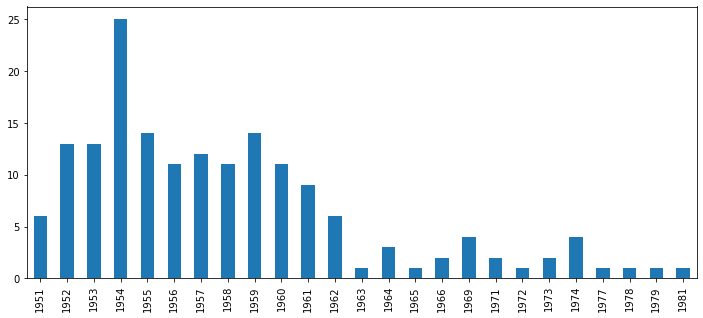

In [9]:
df[df.publisher == 'REMP'].issue_pub_year.value_counts().sort_index().plot(kind='bar', figsize=(12, 5), xlim=(1950, 2000))

As can be seen from the bar graph above, the REMP publications are mostly published in the 1950s and early 1960s, just before merging with *Migration* to become the *International Migration* journal. In more than one way, the REMP publications and IM can therefore be seen as a single continuous publication series edited by Gunther Beyer.

<AxesSubplot:>

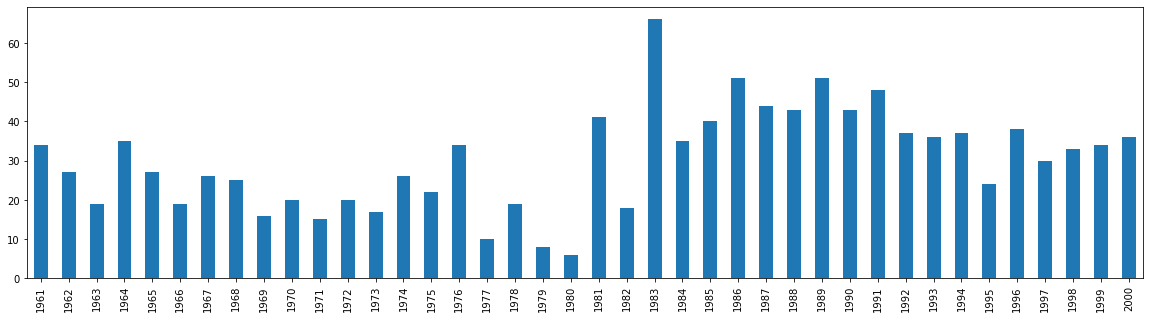

In [10]:
df[df.publisher == 'Wiley'].issue_pub_year.value_counts().sort_index().plot(kind='bar', figsize=(20, 5))

Counting the number of IM articles per year reveals a dip between 1977 and 1980 (e.g. 1979 has only 8, 1980 has only 6), whereas others years have more than 15. In contrast, 1983 has a strong peak with over 60 publications. We investigate these dips and peak below.

For now, we also observe that the number of articles per year seems to increase over time.  


<AxesSubplot:>

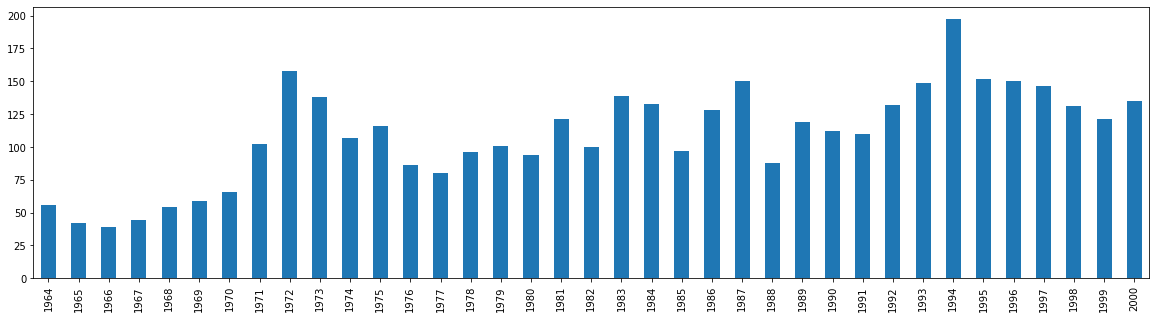

In [11]:
df[df.publisher == 'Sage Publishing'].issue_pub_year.value_counts().sort_index().plot(kind='bar', figsize=(20, 5))

Here we also see an overall increase in publications, with some small dips and peaks, but nothing that signals a potential problem.

### Investigating dips in yearly publications

We zoom in on the years for which IM has few publications to see if issues that would constrain the analysis.

In [12]:
temp_df = wiley_df[wiley_df.issue_pub_year.isin([1977, 1978 ,1979, 1980])]
temp_df[['issue_pub_year','issue_number']].sort_values(['issue_pub_year', 'issue_number']).drop_duplicates()

,issue_pub_year,issue_number
921,1977,1
451,1977,4
390,1978,1
619,1978,2
1039,1978,3-4
556,1979,1-2
830,1980,1-2


Listing the issues of those years reveals that each year had only one or two short issues. E.g. for 1977 only issues 1 and 4 are available (suggesting 2 and 3 are missing), and for 1979 and 1980 only a single volume double issue is available (perhaps the only issue published in those year). 

This could be a signal that there is a mistake in the data extraction process, or that these were just unusual years. Checking the journal website reveals that these are the only issues available, so there seems to be no mistake in the extraction process. The fact that only issues 1 and 4 for 1977 are present does suggest that the Wiley website is missing two issues.

In contrast, in some years, there are relatively many articles. This is because each original article is published in three languages (English, French and Spanish), for instance Issue 2 in Volume 21 (from 1983). See [https://onlinelibrary.wiley.com/toc/14682435/1983/21/2](https://onlinelibrary.wiley.com/toc/14682435/1983/21/2).


In [13]:
df[(df.issue_pub_year == 1983) & (df.article_author.isna())][['article_author', 'article_title']]

,article_author,article_title
126,None,"Books, Periodicals, Pamphlets, Statistics"
827,None,Book Reviews
828,None,"Books, Periodicals, Pamphlets, Statistics"
829,None,INTERGOVERNMENTAL COMMITTEE FOR MIGRATION COMI...
952,None,Addendum
953,None,"Books, Periodicals, Pamphlets, Statistics"
1093,None,Bibliography on Undocumented Migrants or Migra...
1094,None,Introduction
1095,None,Introduction
1096,None,Introduction


These records of the same publication in multiple languages has consequences for the content analysis of the titles. Although most words across the three languages do not overlap, some do, and counting all three versions would artificially inflate their counts in a frequency analysis. 